In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
df = pd.read_csv('maribelajar-labeling.csv')
df = df.drop(labels="Unnamed: 0", axis=1)
df = df.dropna()
df

,Steming,Label
0,terimakasih,Positif
1,nyimpan gamenya gimana,Positif
2,save world,Positif
3,bagus,Positif
4,subscribe boss terimakasih,Positif
...,...,...
142,matur terimakasih,Positif
143,simak kemarin tinggal,Netral
144,simak,Netral
145,terimakasih,Positif


In [3]:
pd.value_counts(df['Label'])

C:\Users\Laurence Nicholas S\AppData\Local\Temp\ipykernel_18588\626637336.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Label'])


Label
Positif    78
Netral     61
Negatif     8
Name: count, dtype: int64

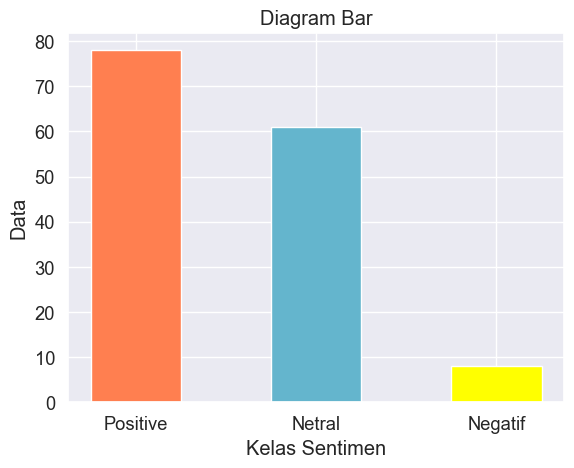

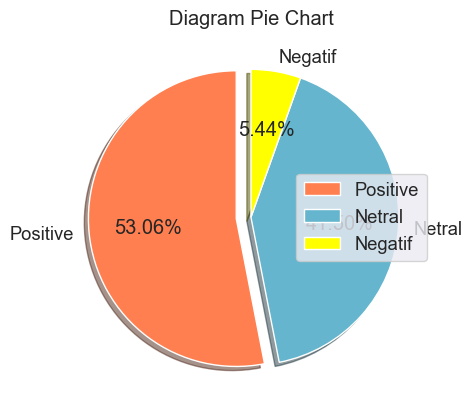

In [4]:
labels = ['Positive','Netral','Negatif']
Category2 = [78,61,8]
plt.bar(labels, Category2, tick_label=labels, width=0.5, color=['coral', 'c','yellow'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar')
plt.show()

#pie chart
color = ['coral', 'c','yellow']
plt.pie(Category2, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0, 0))
plt.title('Diagram Pie Chart')
plt.legend()
plt.show()

In [5]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(df['Steming'], df['Label'], test_size = 0.1, random_state = 1)

In [6]:
# Membuat data frame dari hasil split
df_train90 = pd.DataFrame()
df_train90['Steming'] = train_X
df_train90['Label'] = train_Y

df_test10 = pd.DataFrame()
df_test10['Steming'] = test_X
df_test10['Label'] = test_Y

In [7]:
#Data frame train hasil pembagian
df_train90

,Steming,Label
33,publisher kakak,Netral
73,ajar bro,Netral
29,publihsher,Netral
66,versi web versi desktop windows macbook instal...,Netral
35,beli lisensi offline mana,Negatif
...,...,...
133,manfaat banget,Positif
137,mantap meng edukasi,Positif
72,game online dukung kakak windows education,Positif
140,nama lengkap bicara,Netral


In [8]:
#Data Frame test Hasil Pembagian
df_test10

,Steming,Label
99,terimakasih ilmunyasmga sukses sehat,Positif
93,keren bangettrims ilmu,Positif
54,simpel terimakasih,Positif
103,manfaat,Positif
98,terima kasih bu,Positif
75,manfaat banget terimakasih kakaaa,Positif
89,kakak nanyaini murid login masuk beranda suruh...,Positif
53,terima kasih cerah sukses kakak,Positif
44,terimakasih bemanfaat tutorial aetting dns gag...,Negatif
59,good explanation terimakasih,Positif


In [10]:
df_test10.to_csv('maribelajar-test10.csv')

In [11]:
df_train90.to_csv('maribelajar-train90.csv')

In [14]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect_9010 = TfidfVectorizer()
tfidf_vect_9010.fit(df['Steming'])
train_X_tfidf_9010 = tfidf_vect_9010.transform(df_train90['Steming'])
test_X_tfidf_9010 = tfidf_vect_9010.transform(df_test10['Steming'])

In [16]:
#melihat hasil pembobotan TF-IDF pada data train
print(train_X_tfidf_9010)

  (0, 298)	0.888112548256961
  (0, 166)	0.4596260454201079
  (1, 42)	0.8058546859867848
  (1, 1)	0.5921133549187524
  (2, 297)	1.0
  (3, 398)	0.5369516107353264
  (3, 393)	0.2852264128507268
  (3, 388)	0.6176701362284154
  (3, 206)	0.2852264128507268
  (3, 147)	0.2684758053676632
  (3, 76)	0.3088350681142077
  (4, 261)	0.5015882316255766
  (4, 212)	0.5015882316255766
  (4, 201)	0.5431055074147043
  (4, 31)	0.44928265001585604
  (5, 350)	0.888112548256961
  (5, 166)	0.4596260454201079
  (6, 366)	0.3608742489181004
  (6, 166)	0.3054642733109818
  (6, 156)	0.6789616636102656
  (6, 118)	0.5616693097775339
  (7, 298)	1.0
  (8, 235)	0.4705070631015448
  (8, 144)	0.5094516998929859
  (8, 130)	0.5094516998929859
  :	:
  (125, 159)	0.2924092109113341
  (125, 60)	0.2924092109113341
  (125, 4)	0.2924092109113341
  (126, 337)	0.43357545497714767
  (126, 268)	0.4694632023458299
  (126, 192)	0.4694632023458299
  (126, 46)	0.4694632023458299
  (126, 31)	0.3883622404031506
  (127, 213)	0.6441009930503

In [17]:
#melihat hasil pembobotan TF-IDF pada data test
print(test_X_tfidf_9010)

  (0, 366)	0.31652049402997096
  (0, 347)	0.49263655676524754
  (0, 317)	0.5499894094135904
  (0, 139)	0.5955129296080766
  (1, 176)	0.5730497522873061
  (1, 138)	0.48690468797608005
  (1, 21)	0.6591948165985324
  (2, 366)	0.46933359415067133
  (2, 331)	0.8830209382577588
  (3, 213)	1.0
  (4, 365)	0.5517028632983187
  (4, 171)	0.5391299850418847
  (4, 45)	0.6363668830613153
  (5, 366)	0.3394271473658104
  (5, 213)	0.4448337295399913
  (5, 165)	0.6386103229612246
  (5, 20)	0.5282887658298353
  (6, 405)	0.29605097245350387
  (6, 348)	0.29605097245350387
  (6, 256)	0.2786646666588044
  (6, 249)	0.29605097245350387
  (6, 245)	0.29605097245350387
  (6, 220)	0.2786646666588044
  (6, 203)	0.29605097245350387
  (6, 166)	0.28843537676857717
  :	:
  (10, 246)	0.7835853851768773
  (11, 295)	0.37665597430805814
  (11, 265)	0.3478628029086203
  (11, 195)	0.37665597430805814
  (11, 117)	0.37665597430805814
  (11, 85)	0.32743372268690135
  (11, 83)	0.32743372268690135
  (11, 63)	0.37665597430805814
 

In [18]:
print(train_X_tfidf_9010.shape)
print(test_X_tfidf_9010.shape)

(132, 408)
(15, 408)


In [19]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect_9010.vocabulary_)

{'terimakasih': 366, 'nyimpan': 258, 'gamenya': 104, 'gimana': 110, 'save': 313, 'world': 402, 'bagus': 18, 'subscribe': 344, 'boss': 41, 'musik': 246, 'nama': 248, 'izin': 151, 'share': 328, 'terima': 365, 'kasih': 171, 'tambah': 354, 'ilmuterimakasihbarakallah': 140, 'keren': 176, 'ilmu': 138, 'sudan': 345, 'imu': 141, 'mantap': 215, 'bermanpaat': 35, 'mendeley': 227, 'pilih': 282, 'type': 381, 'of': 259, 'sourcenya': 338, 'mohon': 238, 'bantu': 24, 'bingung': 39, 'sendiribrpivot': 323, 'powerbrpivot': 289, 'tabelbrgrafik': 351, 'aplikasi': 12, 'database': 72, 'kakak': 166, 'saran': 312, 'ms': 241, 'word': 401, 'gabisa': 100, 'masukin': 221, 'akun': 6, 'gaptek': 108, 'iya': 150, 'template': 362, 'ambil': 9, 'google': 113, 'guna': 117, 'banget': 20, 'orang': 265, 'laptop': 195, 'dukung': 85, 'download': 83, 'ps': 295, 'corel': 63, 'senang': 322, 'pakai': 267, 'data': 71, 'searching': 315, 'rasa': 301, 'video': 390, 'tonton': 374, 'bambankk': 19, 'harga': 123, 'karya': 170, 'gambar': 1

In [20]:
from sklearn.svm import SVC

#Menerapkan pemodelan SVM pada data train
model = SVC(kernel='linear',
            decision_function_shape='ovr',
           C=1.0)
clf = model.fit(train_X_tfidf_9010,train_Y)

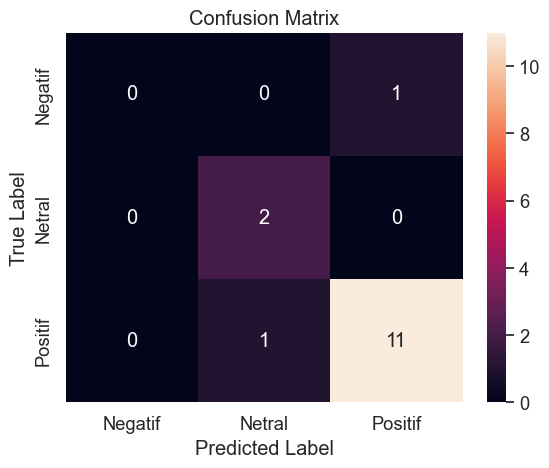

In [22]:
# Proses Pengujian
predictions_SVM_9010 = clf.predict(test_X_tfidf_9010)

#simpan data frame
test_prediction_9010 = pd.DataFrame()
test_prediction_9010['Text'] = test_X
test_prediction_9010['Label'] = predictions_SVM_9010

test_prediction_9010.to_csv('maribelajar-test_prediction_9010.csv')

from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["Negatif","Netral","Positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_9010), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [23]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report

print (classification_report(test_Y, predictions_SVM_9010))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_9010))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_9010, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_9010, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_9010, average='macro'))

              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         1
      Netral       0.67      1.00      0.80         2
     Positif       0.92      0.92      0.92        12

    accuracy                           0.87        15
   macro avg       0.53      0.64      0.57        15
weighted avg       0.82      0.87      0.84        15

Accuracy of the model :  0.8666666666666667
Precision of the model:  0.5277777777777778
Recall of the model:  0.6388888888888888
F1-score of the model:  0.5722222222222223


c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [24]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(train_X_tfidf_9010,train_Y)
predictions= clf.predict(test_X_tfidf_9010)

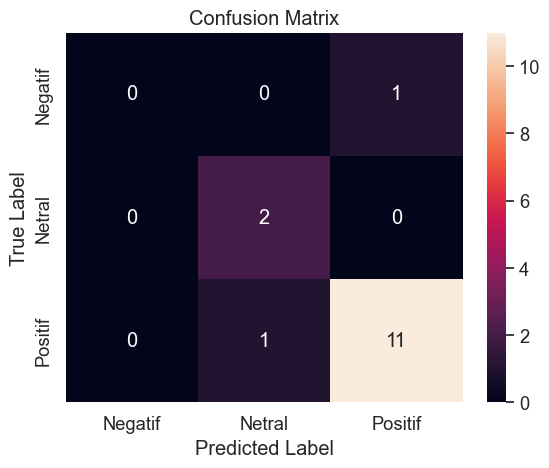

In [25]:
from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["Negatif","Netral","Positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [26]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report


print (classification_report(test_Y, predictions))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions))
print('Precision of the model: ', precision_score(test_Y, predictions, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions, average='macro'))

              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         1
      Netral       0.67      1.00      0.80         2
     Positif       0.92      0.92      0.92        12

    accuracy                           0.87        15
   macro avg       0.53      0.64      0.57        15
weighted avg       0.82      0.87      0.84        15

Accuracy of the model :  0.8666666666666667
Precision of the model:  0.5277777777777778
Recall of the model:  0.6388888888888888
F1-score of the model:  0.5722222222222223


c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c